# ***Goal: Predict the price of used cars based on its features.***

---



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Split arrays or matrices into random train and test subsets** Training subset for applying the model and testing subset for prediction of output using same model. 

In [ ]:
from sklearn.model_selection import train_test_split  

The sklearn.**preprocessing** package **provides several common utility functions** and **transformer classes** to **change raw feature vectors into a representation** that is more suitable for the downstream estimators.

In [ ]:
from sklearn import preprocessing ### library --mathematicalfunction-- min-max -scalar to import 

**MinMaxScaler from preprocessing package**: Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

**PolynomialFeatures from preprocessing package**: Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [ ]:
from sklearn.preprocessing import MinMaxScaler            ### column of data with different vaue..uniform the data-..normalization...
from sklearn.preprocessing import PolynomialFeatures

**IMPORTING ALL THE MODELS OF MACHINE LEARNING**

*   **Linear Regression**: The idea of linear regression is simply finding a line that best fits the data.
*   **Support Vector Machine OR Support Vector Regression (SVM OR SVR)**: to minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated. 
*   **Random Forest Regressor:** Random forests are an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. 
*   **MLP Regressor [Neural Network function]**: The Multilayer Perceptron regressor is able to handle complex non-linear regression problems by forming higher-order representations of the input features using intermediate user-defined hidden layers. The MLP also has network snapshotting and progress monitoring to ensure that the model achieves the highest validation score per a given training time budget.

LINK TO UNDERSTAND BASICS OF ML MODELS:

# [**All Machine Learning Models Explained in 6 Minutes**](https://towardsdatascience.com/all-machine-learning-models-explained-in-6-minutes-9fe30ff6776a)






**Ridge**: This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [ ]:
from sklearn.linear_model import Ridge               ##### mathematical function.. square functiom...error...
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR         
from sklearn.feature_selection import SelectKBest, f_regression   
from sklearn.ensemble import RandomForestRegressor   
from sklearn.neural_network import MLPRegressor   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
audi_dataset = pd.read_csv('/content/drive/MyDrive/Data-Science-project-files/uk used cars/audi.csv')
audi_dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DATA ANALYSIS AND EXPLORATION**

In [ ]:
print(audi_dataset.model.unique())
print(audi_dataset.transmission.unique())
print(audi_dataset.fuelType.unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
['Manual' 'Automatic' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid']


In [ ]:
# 5 numerical columns
# 1 year
# 3 categorical columns

In [ ]:
audi_dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [ ]:
Model_number = pd.DataFrame(audi_dataset['model'].value_counts())

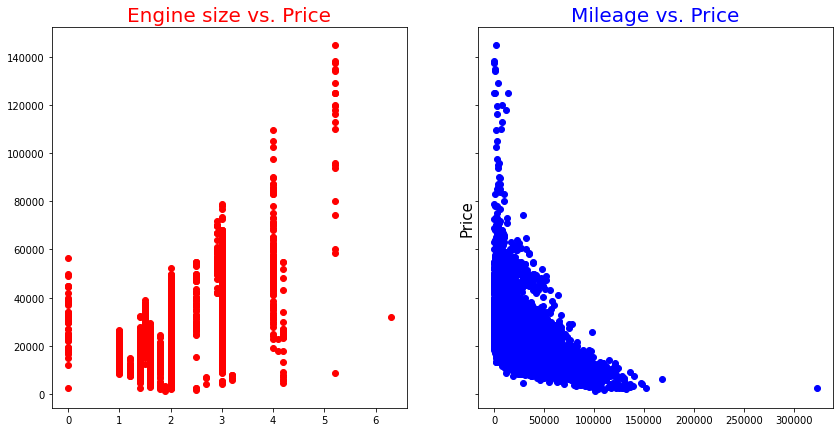

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
plt.gcf().set_size_inches(14, 7)
ax2.scatter(audi_dataset.mileage, audi_dataset.price, c = 'blue')
ax2.set_title('Mileage vs. Price', c = 'blue', fontsize = 20)
ax1.scatter(audi_dataset.engineSize, audi_dataset.price, c='red')
ax1.set_title('Engine size vs. Price', c ='red', fontsize =20)
plt.ylabel('Price', fontsize = 15)
plt.show()

In [ ]:
audi_model_data = audi_dataset.copy()
audi_model_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


# **MACHINE LEARNING PHASE**

**Changing the output column (here, price) to the right end**

In [ ]:
audi_model_data = audi_model_data[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']]
audi_model_data.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300


**Taking out the catagorical features to the right end** For more number of features and better model prediction







---



---



In [ ]:
audi_data_dummy = pd.get_dummies(audi_model_data) ###### dummies.. to have more number of CATEGORICAL features .. indexing
audi_data_dummy.head()
audi_data_dummy.shape

(10668, 38)

In [ ]:
audi_data_dummy.head()

,year,mileage,tax,mpg,engineSize,price,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R8,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,15735,150,55.4,1.4,12500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2016,36203,20,64.2,2.0,16500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,2016,29946,30,55.4,1.4,11000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2017,25952,145,67.3,2.0,16800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,2019,1998,145,49.6,1.0,17300,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


**fit_transform()**
fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. 

These learned parameters are then used to scale our test data.
So what actually is happening here! 

The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

Now, we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case.



**transform()**
Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.

[Link for more information ](https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe#:~:text=fit_transform())

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()                                             # It is to keep the features of numerical values into same range between 0 to 1 so that each feature plays an important role in prediction
audi_data_DS1 = min_max_scaler.fit_transform(audi_data_dummy.drop(columns= ['price']))  #USING fit_transform for scaling

In [ ]:
audi_data_DS2 = pd.DataFrame(audi_data_DS1)                                                        #Here, we see all the 37 features scaled from 0 to 1. One additional unscaled price column converted from scaled price column.  
price = audi_model_data['price']        
frames = [audi_data_DS2,price]
audi_data_DS=pd.concat(frames,axis=1)
print(audi_data_DS.head())
print(audi_data_DS.shape)

          0         1         2         3         4  ...   33   34   35   36  price
0  0.869565  0.048712  0.258621  0.215466  0.222222  ...  0.0  0.0  0.0  1.0  12500
1  0.826087  0.112081  0.034483  0.267414  0.317460  ...  0.0  1.0  0.0  0.0  16500
2  0.826087  0.092709  0.051724  0.215466  0.222222  ...  0.0  0.0  0.0  1.0  11000
3  0.869565  0.080344  0.250000  0.285714  0.317460  ...  0.0  1.0  0.0  0.0  16800
4  0.956522  0.006183  0.250000  0.181228  0.158730  ...  0.0  0.0  0.0  1.0  17300

[5 rows x 38 columns]
(10668, 38)


 **APPLYING FEATURE SCALING ALGORITHM**
Link:
 [**All about Feature Scaling**](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(audi_data_DS.drop(columns = ['price']),
                                                    audi_data_DS[['price']],
                                                    test_size = 0.2, random_state = 42)           ### what is random state? every time you run the data, its in the same run constant.. thumb rule::: 42... test size 0f 0.2 indicates that 20% of dataset were taken for testing. 

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8534, 37)
(8534, 1)
(2134, 37)
(2134, 1)


Here, we are basically declaring empty lists ( N, r_squared_train , and r_squared_test ) , basically to fill it with values later  once they are found when your run the FOR loop , so for every iteration the empty lists ( N ,r_squared...) Are appended with new values ( we do it using .append method ) , so once the FOR loop is over you can use the appended list to plot the graph .

**selector = SelectKBest(f_regression, k = k)**: Select features according to the k highest scores.

Others:
**feature_importances_** — Feature Importance Method

**.corr()** — Correlation Method

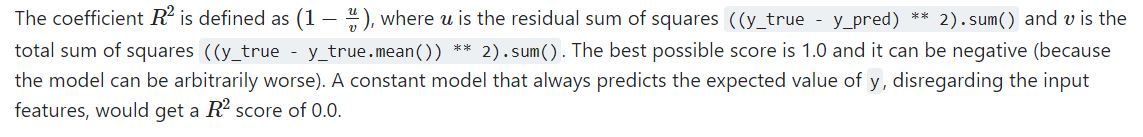

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arra

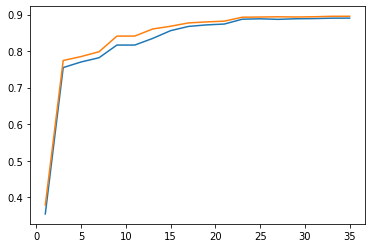

In [ ]:
#evaluating best features

features = audi_data_DS.drop(columns = ['price']).columns

N = []                                                                        #NO. OF FEATURES 
r_squared_train = []
r_squared_test = []

for k in range(1, 37, 2):                                                        # 37 is because of 37 features, 1 is the initial, 2 is the step size
    
    selector = SelectKBest(f_regression, k = k)                   
    
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    
    LR = LinearRegression()
    LR.fit(X_train_transformed, y_train)
    
    N.append(k)
    r_squared_train.append(LR.score(X_train_transformed, y_train))
    r_squared_test.append(LR.score(X_test_transformed, y_test))
    
sns.lineplot(x = N, y = r_squared_train)
sns.lineplot(x = N, y = r_squared_test)
plt.show()

The k-score is the point where train and test fits. Using it to see which features are the best below:

In [ ]:
selector = SelectKBest(f_regression, k = 23)                      ### k= 23 is the point where features of train and test are fitting 
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
features[selector.get_support()]                                # Get a mask, or integer index, of the features selected Parameters. Gives the index of the best features found by highest k score. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Index([ 0,  1,  2,  3,  4,  5,  7,  8, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22,
       29, 31, 32, 33, 35],
      dtype='object')

Here, the goal is to find the best model for prediction by finding the score using linear and polynomial features. Linear features do not multiply the features and keeps them as it is (Ex: a, b, c). Polynomial features multiplies the features leading to increase in the number of features. Polynomial simply means higher degree order than 1. Applying polynomial features improves the score due to increase in features (Ex: a, b, c, ab, bc, ac)

In [ ]:
#linear

def regression_function(model):
    
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)   
    
    return regressor, score

In [ ]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
model_selections = [LinearRegression(),  MLPRegressor(), Ridge(), SVR(), RandomForestRegressor()]

for model in model_selections:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.892661
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.213677
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.891836
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.004668
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.964166


In [ ]:
#using polynomials
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

(8534, 741)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

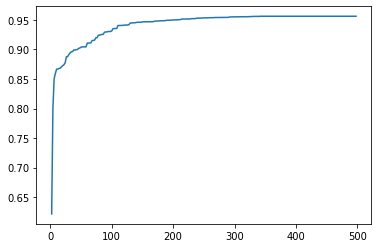

In [ ]:
N = []   #no.of features
r_squared = []

for k in range(2, 500, 2): 
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    R = LinearRegression()
    R.fit(X_train_transformed, y_train)
    N.append(k)
    r_squared.append(R.score(X_train_transformed, y_train))
    
sns.lineplot(x = N, y = r_squared)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression 

In [ ]:
selector = SelectKBest(f_regression, k =300)

X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

models_used = [LinearRegression(), MLPRegressor(), Ridge(), SVR(), RandomForestRegressor(),]

for model in models_used:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",8.926612e-01
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",2.136770e-01
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",8.918362e-01
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-4.668353e-03
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",9.641660e-01
5,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",-7.402651e+17
6,Polynomial,"MLPRegressor(activation='relu', alpha=0.0001, ...",5.913941e-01
7,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",9.393791e-01
8,Polynomial,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-2.589908e-02
9,Polynomial,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",9.631543e-01


DecisionTreeRegressor has the highest score in both linear and polynomial features.



In [ ]:
RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)
RF.fit(X_train_transformed_poly, y_train)

y_pred = RF.predict(X_test_transformed_poly) #predicts the price using random forest regression using polynomial features.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
y_test = y_test.reset_index(drop=True)
y_pred_df = pd.DataFrame({'Price_prediction': y_pred.flatten()})

In [ ]:
Comparison = y_test.join(y_pred_df) #Comparing the predicted price vs original price by joining them
Comparison.head(100)

,price,Price_prediction
0,9990,9533.970000
1,22382,20668.272333
2,28990,29735.973238
3,30777,27584.133984
4,14950,14659.645000
...,...,...
95,15970,15419.096000
96,31000,27940.308000
97,22365,22565.917000
98,14995,16605.682000


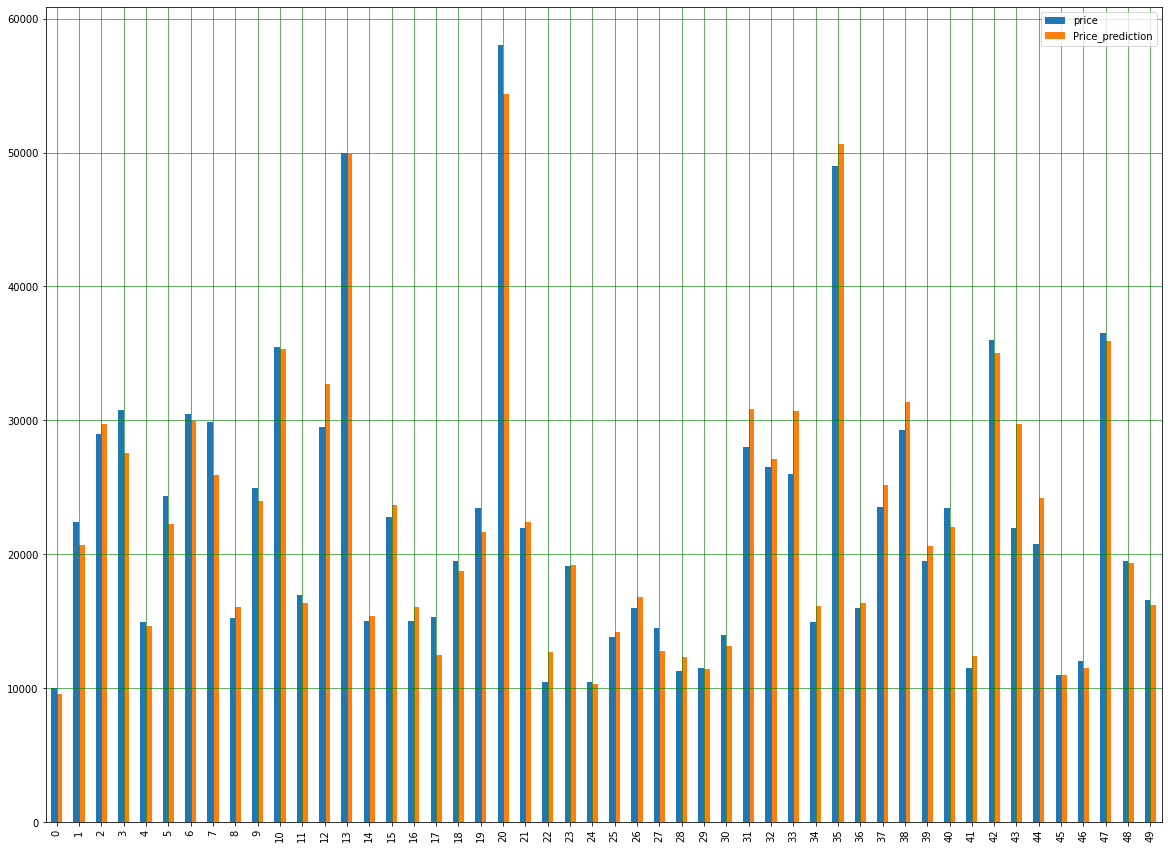

In [ ]:
x = 50
comparison = Comparison.head(x)
comparison.plot(kind = 'bar', figsize = (20,15))
plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
plt.show()

**XG Boost **

In [ ]:
import xgboost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=15000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [ ]:
model.fit(X_train,y_train)

[18:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=15000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
R_square=r2_score(y_pred,y_test)
print(R_square)

0.9622195125620148


In [ ]:
y_pred_df= pd.DataFrame({'Price_prediction': y_pred})
y_test_df = pd.DataFrame(y_test)
y_test = y_test.reset_index()
Comparison = y_test.join(y_pred_df) 
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head()

,price,Price_prediction
0,9990,10305.710938
1,22382,20648.871094
2,28990,29648.955078
3,30777,26992.353516
4,14950,15870.942383


In [ ]:
print(y_pred)

[10305.711 20648.871 29648.955 ... 15821.789 20586.64  11583.252]
